In [0]:
# import IMDB datasets
#We'll be working with "IMDB dataset", a set of 50,000 highly-polarized reviews from the Internet Movie Database.
#They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.
from keras.datasets import imdb

# load_data as train and test sets

(train_data,train_labels), (test_data, test_labels) =imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


The argument num_words=10000 means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows us to work with vector data of manageable size.

The variables train_data and test_data are lists of reviews, each review being a list of word indices (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":

In [0]:
train_data.shape

(25000,)

In [0]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [0]:
# Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:

max([max(sequence) for sequence in train_data])

9999

In [0]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 0us/step


In [0]:
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [0]:
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".


decoding_reviews = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [0]:
decoding_reviews

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

We cannot feed lists of integers into a neural network. We have to turn our lists into tensors.

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [0]:
# Our vectorized labels# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now our data is ready to be fed into a neural network.

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Here's the step where we configure our model with the rmsprop optimizer and the binary_crossentropy loss function. Note that we will also monitor accuracy during training.

In [0]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              matrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


We are passing our optimizer, loss function and metrics as strings, which is possible because rmsprop, binary_crossentropy and accuracy are packaged as part of Keras. Sometimes you may want to configure the parameters of your optimizer, or pass a custom loss function or metric function. This former can be done by passing an optimizer class instance as the optimizer argument:

In [0]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

The latter can be done by passing function objects as the loss or metrics arguments:

In [0]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

Validating our approach In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a "validation set" by setting apart 10,000 samples from the original training data:

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train our model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples. At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by passing the validation data as the validation_data argument:

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.0078 - binary_accuracy: 0.9979 - val_loss: 0.7356 - val_binary_accuracy: 0.8672
Epoch 2/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.0016 - binary_accuracy: 0.9999 - val_loss: 0.7967 - val_binary_accuracy: 0.8607
Epoch 3/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.0047 - binary_accuracy: 0.9991 - val_loss: 0.7947 - val_binary_accuracy: 0.8662
Epoch 4/20
15000/15000 [==============================] - 1s 90us/step - loss: 7.9967e-04 - binary_accuracy: 1.0000 - val_loss: 0.8141 - val_binary_accuracy: 0.8652
Epoch 5/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.0034 - binary_accuracy: 0.9990 - val_loss: 0.8476 - val_binary_accuracy: 0.8625
Epoch 6/20
15000/15000 [==============================] - 1s 92us/step - loss: 5.2103e-04 - binary_accuracy: 1.0000 - val_loss: 0.8570 - val

On CPU, this will take less than two seconds per epoch -- training is over in 20 seconds. At the end of every epoch, there is a slight pause as the model computes its loss and accuracy on the 10,000 samples of the validation data.

Note that the call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training. Let's take a look at it:

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

It contains 4 entries: one per metric that was being monitored, during training and during validation. Let's use Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy:

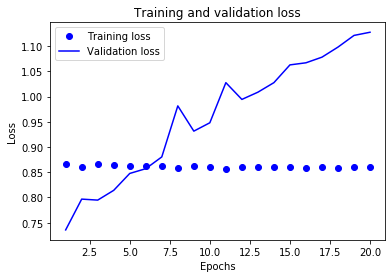

In [0]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['loss']
loss = history.history['val_binary_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
#plt.clf()   # clear figure
#acc_values = history_dict['binary_accuracy']
#val_acc_values = history_dict['loss']

#plt.plot(epochs, acc, 'bo', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.legend()

#plt.show()

Let's train a new network from scratch for four epochs, then evaluate it on our test data:

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.4540 - acc: 0.8183
Epoch 2/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.2627 - acc: 0.9102
Epoch 3/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.2038 - acc: 0.9279
Epoch 4/4
25000/25000 [==============================] - 2s 72us/step


In [0]:
results

[0.2902780948448181, 0.88476]

Our fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, one should be able to get close to 95%.

Using a trained network to generate predictions on new data
After having trained a network, you will want to use it in a practical setting. You can generate the likelihood of reviews being positive by using the predict method:

In [0]:
model.predict(x_test)

array([[0.1881864 ],
       [0.9988438 ],
       [0.9074842 ],
       ...,
       [0.10727322],
       [0.0791012 ],
       [0.61902547]], dtype=float32)